In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -P datasets
!tar xf datasets/cifar-10-python.tar.gz -C datasets

--2021-11-22 09:20:16--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘datasets/cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  2.03MB/s    in 1m 52s  

2021-11-22 09:22:11 (1.45 MB/s) - ‘datasets/cifar-10-python.tar.gz’ saved [170498071/170498071]



In [9]:
# pickle is used to load the contents of the file
# pickle.load deserializes the file and ssave the contents in the x variable

with open('datasets/cifar-10-batches-py/data_batch_1', 'rb') as input_file:
    X = pickle.load(input_file, encoding='latin1')

In [11]:
X.keys()

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [12]:
X = X['data']

In [13]:
X.shape

(10000, 3072)

In [14]:
X = X.reshape((-1, 3, 32, 32))

X.shape

(10000, 3, 32, 32)

In [15]:
# move the dimensions around to change the shape

X = X.transpose(0, 2, 3, 1)

X.shape

(10000, 32, 32, 3)

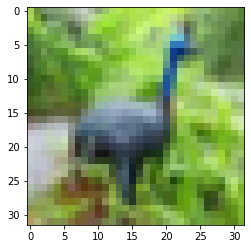

In [16]:
plt.imshow(X[6])

In [17]:
X = X.reshape(-1, 3 * 32 * 32)

X.shape

(10000, 3072)

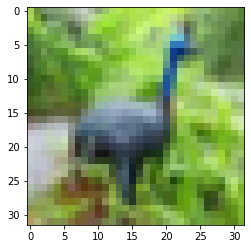

In [18]:
plt.imshow(X[6].reshape(32, 32, 3))
plt.show()

In [19]:
# Center the data around 0 mean and unit standard-deviation

X = X - X.mean(axis=0)
X = X / np.std(X, axis=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


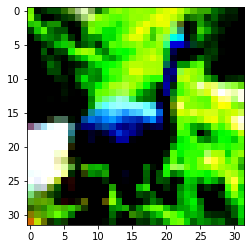

In [22]:
plt.imshow(X[6].reshape(32, 32, 3))

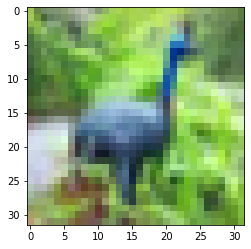

In [23]:
# Scaling all pixels of an image within 0 and 1

def show(i):
    i = i.reshape((32, 32, 3))
    
    m, M = i.min(), i.max()
    
    plt.imshow((i - m) / (M - m))

show(X[6])

In [24]:
# Whitening of an image: used to decorrelate features in our input images.

X_subset = X[:1000]

X_subset.shape

(1000, 3072)

In [27]:
# Step 1: calculate the covariance matrix

cov = np.cov(X_subset, rowvar=True)

In [26]:
cov.shape

(1000, 1000)

In [28]:
# Step-2: Extract the latent factors in covariance matrix
# Decompose the matrix using SVD which performs factor analysis

U, S, V = np.linalg.svd(cov)

In [29]:
print(U.shape)
print(S.shape)
print(V.shape)

(1000, 1000)
(1000,)
(1000, 1000)


In [30]:
# Step-3: Calculate Principal Components of the image features

epsilon = 1e-5

zca_matrix = np.dot(U, np.dot(np.diag(1.0 / np.sqrt(S + epsilon)), U.T))

In [31]:
zca_matrix.shape

(1000, 1000)

In [32]:
# Step-4: Multiply the principal components by the original matrix is whitening

zca = np.dot(zca_matrix, X_subset)

In [33]:
zca.shape

(1000, 3072)

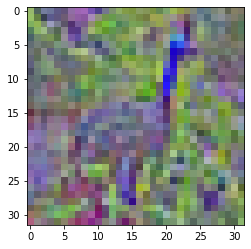

In [35]:
show(zca[6])

In [36]:
import torch
import torchvision
import torchvision.transforms as transforms

In [37]:
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'Enum',
 'F',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'List',
 'Normalize',
 'Optional',
 'PILToTensor',
 'Pad',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'Tensor',
 'ToPILImage',
 'ToTensor',
 'Tuple',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'math',
 'torch',
 'transforms']

In [38]:
# Performing transformation in a sequence

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor()
])

In [39]:
dataset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/train/', download=True, transform=transform)

Files already downloaded and verified


In [40]:
dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./datasets/cifar10/train/
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear)
               ToTensor()
           )

In [42]:
# Load the data in the dataset into batches using a DataLoader

dataloader = torch.utils.data.DataLoader(dataset, 
                                         batch_size=16, 
                                         shuffle=True, 
                                         num_workers=2)

In [43]:
images_batch, labels_batch = iter(dataloader).next()

In [44]:
images_batch.shape

torch.Size([16, 3, 256, 256])

In [45]:
labels_batch.shape

torch.Size([16])

In [46]:
labels_batch

tensor([1, 2, 2, 2, 6, 4, 9, 5, 6, 6, 9, 8, 2, 8, 6, 6])

In [47]:
# Look at all of the images in a batch
# by using a torchvision utility called make_grid

img = torchvision.utils.make_grid(images_batch)

In [48]:
img.shape

torch.Size([3, 518, 2066])

In [50]:
img = np.transpose(img, (1, 2, 0))

In [51]:
img.shape

torch.Size([518, 2066, 3])

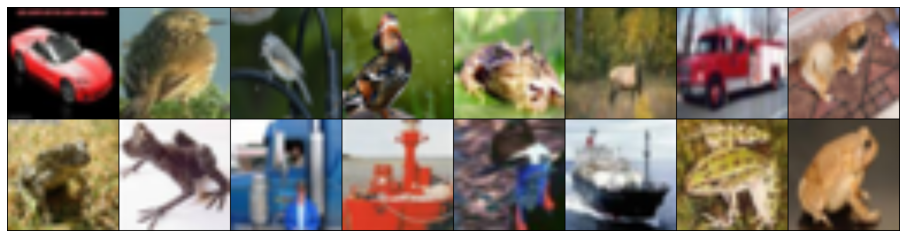

In [52]:
plt.figure(figsize= (16, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

## Calculate the mean and std of a dataset without loading data in one go

In [54]:
# calculate mean and std for each batch and store it in the corresponding lists

pop_mean = []
pop_std = []

In [55]:
for i, data in enumerate(dataloader, 0):
    numpy_image = data[0].numpy()   # contains all of the images in one batch
    
    # calculating means across all channels
    # 0: batch, 2: height, 3: width
    batch_mean = np.mean(numpy_image, axis=(0, 2, 3))
    batch_std = np.std(numpy_image, axis=(0, 2, 3))
    
    pop_mean.append(batch_mean)
    pop_std.append(batch_std)

In [56]:
pop_mean = np.array(pop_mean)
pop_std = np.array(pop_std)

In [57]:
pop_mean.shape, pop_std.shape

((3125, 3), (3125, 3))

In [58]:
pop_mean = pop_mean.mean(axis=0)
pop_std = pop_std.mean(axis=0)

In [59]:
print(pop_mean)
print(pop_std)

[0.49159023 0.4823461  0.44671988]
[0.2381996  0.23482355 0.25256643]


In [60]:
# Applying the transforms on the dataset

transform = transforms.Compose([
                transforms.Resize(256),
                transforms.RandomResizedCrop(224),
                transforms.ColorJitter(),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(pop_mean, 
                                     pop_std)
])

In [62]:
trainset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/train/', train=True, download=True, transform=transform)

Files already downloaded and verified


In [63]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True, num_workers=2)

In [64]:
# Access the first batch of data

images_batch, labels_batch = iter(trainloader).next()

In [65]:
images_batch.shape

torch.Size([16, 3, 224, 224])

In [66]:
img = torchvision.utils.make_grid(images_batch)

img.shape

torch.Size([3, 454, 1810])

In [67]:
img = np.transpose(img, (1, 2, 0))

img.shape

torch.Size([454, 1810, 3])

In [69]:
m, M = img.min(), img.max()

m, M  # these values are in terms of standard deviation

(tensor(-2.0638), tensor(2.1877))

In [70]:
img = (1/(abs(m) * M)) * img + 0.5

In [71]:
img

tensor([[[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.2289, 0.2300, 0.2974],
         ...,
         [0.1705, 0.2189, 0.2424],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        ...,

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.4331, 0.3336, 0.2011],
         ...,
         [0.3200, 0.4112, 0.4625],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.

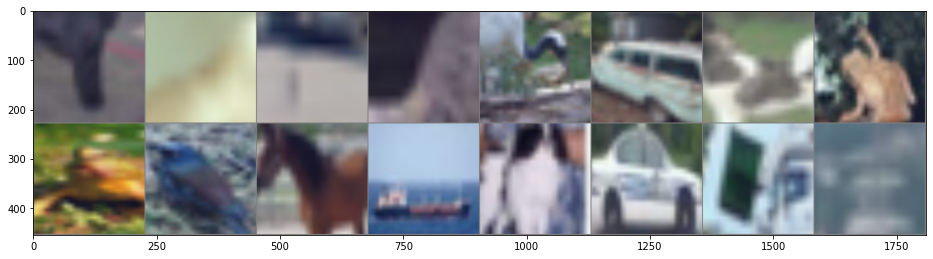

In [73]:
plt.figure(figsize= (16, 12))
plt.imshow(img)
plt.show()